In [2]:
# Only bp on gains and shifts, no hebbian learning on weight matrix, to test the initial bp

In [9]:
import sys
sys.path.append("../training")
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_nohebb_multilayer import SimpleNeuralNetwork

In [10]:
# load the pickle file
filedir = "../weights/"
filename = "weights_abb05_nohebb_multilayer.pkl"
filepath = filedir + filename
with open(filepath, 'rb') as f:
    model = pickle.load(f)
    losses = pickle.load(f)
    gain_changes_0 = pickle.load(f)
    shift_changes_0 = pickle.load(f)
    gains_0 = pickle.load(f)
    shifts_0 = pickle.load(f)
    
    gain_changes_1 = pickle.load(f)
    shift_changes_1 = pickle.load(f)
    gains_1 = pickle.load(f)
    shifts_1 = pickle.load(f)

epochs = len(losses)

In [13]:
ndata = 200
xs = torch.linspace(0, 2 * torch.pi, ndata)
ys = torch.cos(xs)/4 + 0.5
print(len(range(epochs)),len(losses))

100 100


/var/folders/g4/wp9lxrgx2cxfzc9459_1ql_40000gn/T/ipykernel_52617/2084109231.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,0.1])


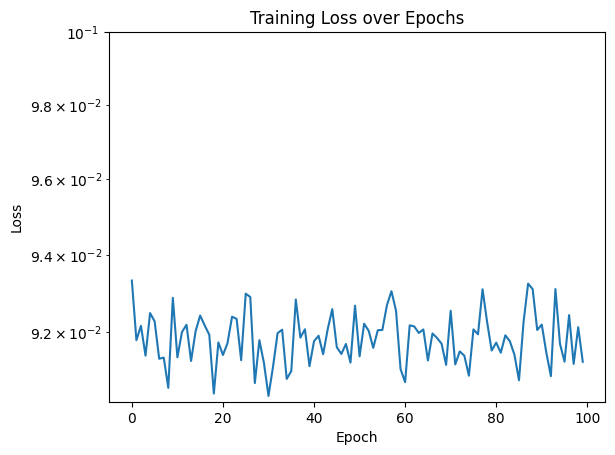

In [14]:
# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale("log")
plt.ylim([0,0.1])
plt.title('Training Loss over Epochs')
# plt.savefig('abb05_loss.png')
plt.show()

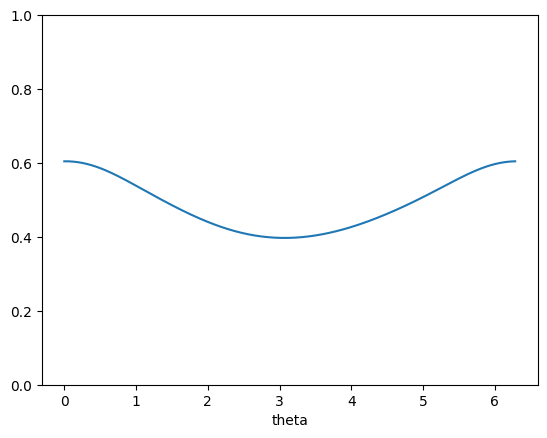

In [16]:
# Plotting the outputs
model.eval()
outputs = []
for x in xs:
    output = model(x)
    # print(output)
    outputs.append(output.item())
plt.plot(xs, outputs)
plt.ylim([0,1])
plt.xlabel("theta")
# plt.savefig('abb05_outputs.png')
plt.show()

100


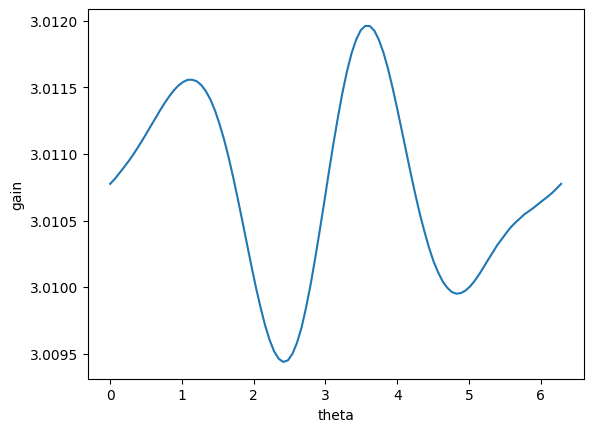

In [31]:
final_gain_0 = gains_0[-1]
print(len(gains_0))

plt.plot(np.linspace(0, 2 * np.pi, model.input_sizes[0]), final_gain.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("gain")
# plt.savefig('abb05_ws.png')
plt.show()

100


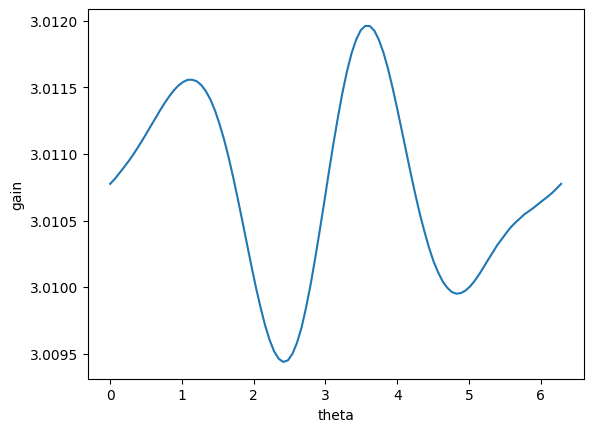

In [30]:
final_gain_1 = gains_1[-1]
print(len(gains_1))
plt.plot(np.linspace(0, 2 * np.pi, model.input_sizes[0]), final_gain.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("gain")
# plt.savefig('abb05_ws.png')
plt.show()

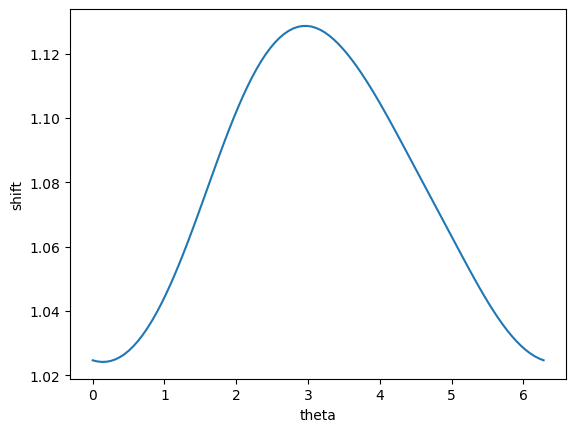

In [33]:
final_shift_0 = shifts_0[-1]
plt.plot(np.linspace(0, 2 * np.pi, model.input_sizes[0]), final_shift.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("shift")
# plt.savefig('abb05_ws.png')
plt.show()

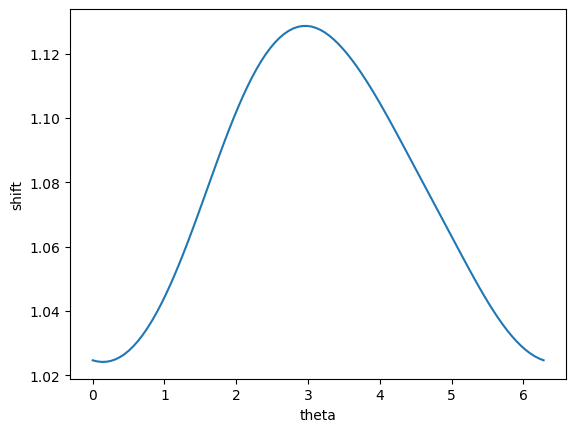

In [34]:
final_shift_1 = shifts_1[-1]
plt.plot(np.linspace(0, 2 * np.pi, model.input_sizes[0]), final_shift.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("shift")
# plt.savefig('abb05_ws.png')
plt.show()

In [35]:
rates = []
for x in xs:
    # guassian_rf currently matches the number of inputs only
    input = model.gaussian_rf(x)
    rate = model.activation_func(model.gain[0] * (input - model.shift[0]))
    rates.append(rate)
rates = torch.cat(rates, dim=1)
rates = rates.detach().numpy().round(4)
rates

array([[0.4815, 0.4811, 0.48  , ..., 0.48  , 0.4811, 0.4815],
       [0.4802, 0.4814, 0.4817, ..., 0.4757, 0.4784, 0.4802],
       [0.4758, 0.4784, 0.4803, ..., 0.4684, 0.4725, 0.4758],
       ...,
       [0.4745, 0.4711, 0.4671, ..., 0.479 , 0.4771, 0.4745],
       [0.4795, 0.4777, 0.4751, ..., 0.4811, 0.4807, 0.4795],
       [0.4815, 0.4811, 0.48  , ..., 0.48  , 0.4811, 0.4815]],
      dtype=float32)

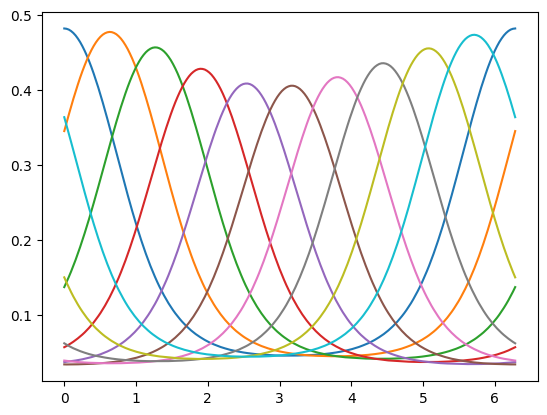

In [36]:
for i in np.arange(0,model.input_sizes[0],10):
    thisr = rates[i,:]
    plt.plot(xs, thisr)
plt.show()

In [45]:
# rates = []
# print(len(model.gain[1]))
# print(len(model.shift[1]))
# for x in xs:
#     input = model.gaussian_rf(x)
#     rate = model.activation_func(model.gain[1] * (input - model.shift[1]))
#     rates.append(rate)
# rates = torch.cat(rates, dim=1)
# rates = rates.detach().numpy().round(4)
# rates

In [47]:
# for i in np.arange(0,model.input_sizes[0],10):
#     thisr = rates[i,:]
#     plt.plot(xs, thisr)
# plt.show()

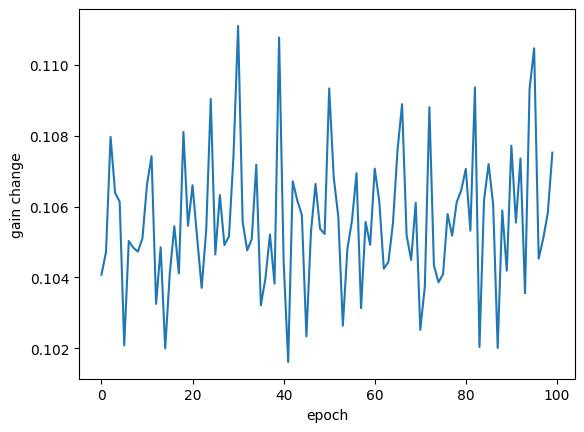

In [48]:
plt.plot(np.arange(epochs), gain_changes_0)
plt.xlabel("epoch")
plt.ylabel("gain change")
# plt.savefig('abb05_gc.png')
plt.show()

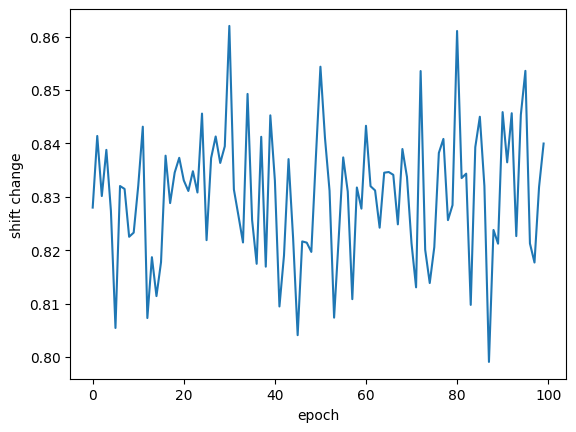

In [26]:
plt.plot(np.arange(epochs), shift_changes_0)
plt.xlabel("epoch")
plt.ylabel("shift change")
# plt.savefig('abb05_gc.png')
plt.show()